# Coconut classification with TensorFlow Lite Model Maker with TensorFlow 2.0

References :

[1]https://www.tensorflow.org/lite/tutorials/model_maker_image_classification

[2] https://towardsdev.com/


In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

Model Maker library simplifies the process of adapting and converting a TensorFlow neural-network model to particular input data when deploying this model for on-device ML applications.



## Prerequisites

install serveral required packages, including Model Maker package that in github [repo](https://github.com/tensorflow/examples/tree/master/tensorflow_examples/lite/model_maker).

In [ ]:
!pip install -q tflite-model-maker

Import the required packages.

In [ ]:
from tflite_model_maker import image_classifier
from tflite_model_maker.image_classifier import DataLoader

import tensorflow as tf
assert tf.__version__.startswith('2')

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Get the data path

Let's get the images

In [ ]:
image_path = '/content/drive/MyDrive/coconut_dataset/train'

### 1.   Load input data specific to an on-device ML app. Split it to training data and testing data.

In [ ]:
data = DataLoader.from_folder(image_path)
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

INFO:tensorflow:Load image with size: 876, num_label: 2, labels: mature, tender.


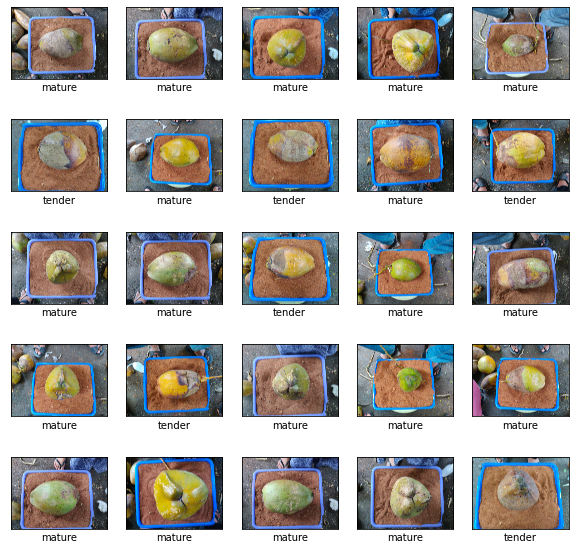

In [ ]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()


### 2. Customize the TensorFlow model.
Create a custom image classifier model based on the loaded data. The default model is EfficientNet-Lite0.

In [ ]:
model = image_classifier.create(train_data, validation_data=validation_data, epochs = 4)

INFO:tensorflow:Retraining the models...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 1280)             3413024   
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 3,415,586
Trainable params: 2,562
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/4


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


21/21 [==============================] - 520s 24s/step - loss: 0.7511 - accuracy: 0.7336 - val_loss: 0.3916 - val_accuracy: 0.8636
Epoch 2/4
21/21 [==============================] - 506s 24s/step - loss: 0.3974 - accuracy: 0.8929 - val_loss: 0.3415 - val_accuracy: 0.8977
Epoch 3/4
21/21 [==============================] - 506s 24s/step - loss: 0.3382 - accuracy: 0.9182 - val_loss: 0.3057 - val_accuracy: 0.9545
Epoch 4/4
21/21 [==============================] - 506s 24s/step - loss: 0.3168 - accuracy: 0.9390 - val_loss: 0.2938 - val_accuracy: 0.9659


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 1280)             3413024   
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 3,415,586
Trainable params: 2,562
Non-trainable params: 3,413,024
_________________________________________________________________


### 3: Evaluate the Customized Model

In [ ]:
loss, accuracy = model.evaluate(test_data)

3/3 [==============================] - 136s 15s/step - loss: 0.3433 - accuracy: 0.9091


Inference

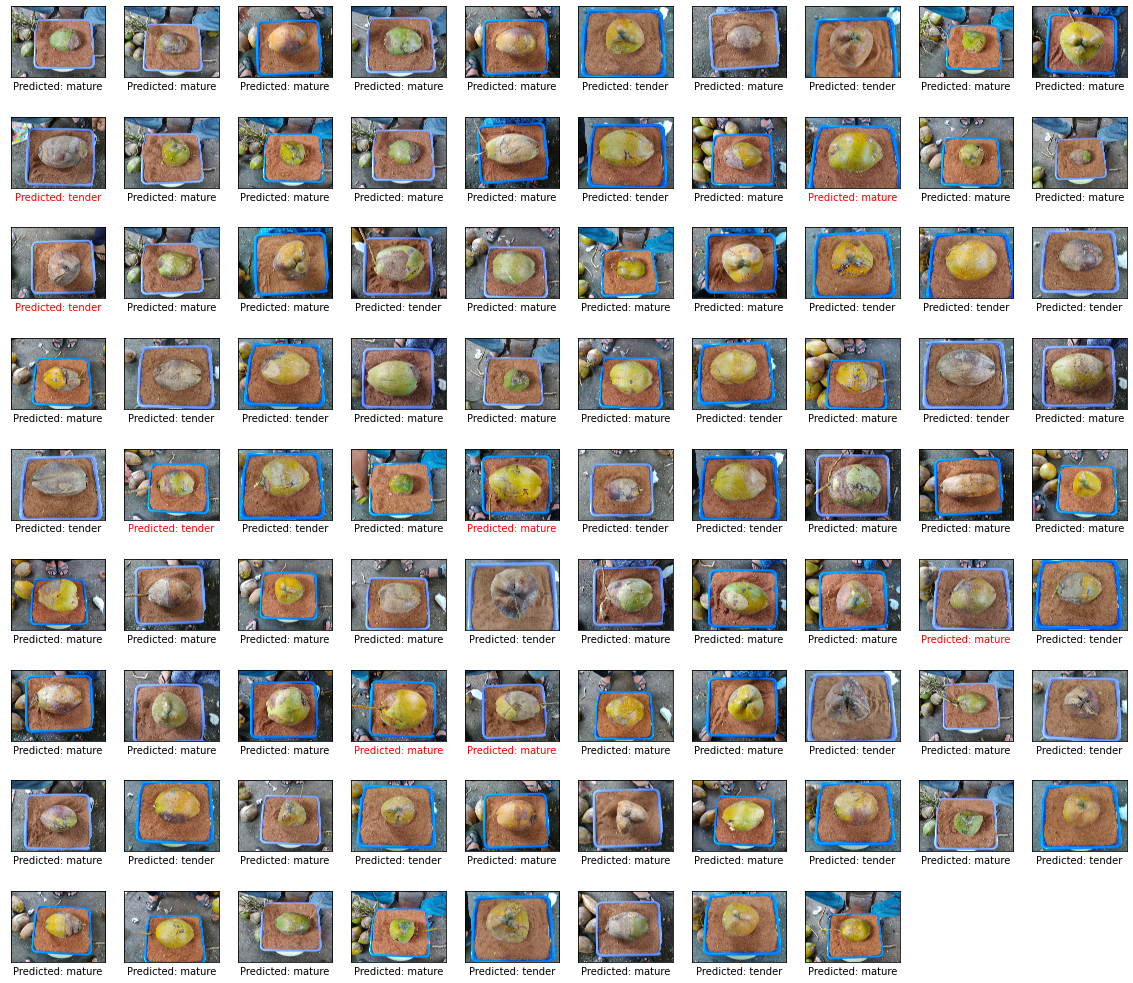

In [ ]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()


### 4.  Export to TensorFlow Lite model.


In [ ]:
model.export(export_dir='/content/drive/MyDrive/SavedModels/12_Apr_EfficientNet-Lite0_80_10_10_Acc90')

INFO:tensorflow:Assets written to: /tmp/tmpvo159vj9/assets


INFO:tensorflow:Assets written to: /tmp/tmpvo159vj9/assets
/usr/local/lib/python3.7/dist-packages/tensorflow/lite/python/convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpyvtk2tal/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmpyvtk2tal/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: /content/drive/MyDrive/SavedModels/12_Apr_EfficientNet-Lite0_80_10_10_Acc90/model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: /content/drive/MyDrive/SavedModels/12_Apr_EfficientNet-Lite0_80_10_10_Acc90/model.tflite


### 5. Download the trained model

In [ ]:
from google.colab import files
files.download('/content/drive/MyDrive/SavedModels/6_Mar_2classes_EfficientNet-Lite0_80_10_10_Acc95/model.tflite') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>